In [ ]:
Hi, I'm going to apply 6 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as poisonous or eatable.

* Logistic Regression
* Support Vector machines (SVC)
* K-Nearest Neighbours(K-NN)
* Naive Bayes classifier
* Decision Tree Classifier
* Random Forest Classifier
* Artificial Neural Networks

We'll proceed by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion) to only 2 variables (Principle Components) and training different classification models over these two principle components. Finally, I'll visualize the outputs so that decision boundaries of different models can be seen in 2D-plane. Here the preference is not given to accuracy as the goal is to visualize the decision boundaries. For greater accuracy one can choose more than two variables.

In [ ]:
### Importing the Libraries

In [ ]:
import pandas as pd

In [ ]:
### Importing the Dataset


In [ ]:
dataset = pd.read_excel(r'C:\Users\koruk\Desktop\Yapay Öğrenme\Commen\common_dataset_touch_features_offset.xlsx')

In [5]:
print (dataset)

      user_id  touch_type  touch  finger   palm   fist   1  2   3   4  ...  \
0           0           0  False   False  False  False   4  0  12 -16  ...   
1           0           0  False   False  False  False -52 -2  17   1  ...   
2           0           0  False   False  False  False   2  7  14  -5  ...   
3           0           0  False   False  False  False   0  6  10   8  ...   
4           0           0  False   False  False  False   2  5   3   0  ...   
...       ...         ...    ...     ...    ...    ...  .. ..  ..  ..  ...   
2051       29           9   True   False   True  False   0  4 -10   3  ...   
2052       29           9   True   False   True  False   8 -3 -13  -3  ...   
2053       29           9   True   False   True  False   8 -9 -12 -16  ...   
2054       29           9   True   False   True  False  56  0   0 -20  ...   
2055       29           0  False   False  False  False  11 -1 -12   2  ...   

      3191  3192  3193  3194  3195  3196  3197  3198  3199  320

In [6]:
dataset.head()

,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,False,False,False,-52,-2,17,1,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,False,False,False,2,7,14,-5,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,False,False,False,0,6,10,8,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,False,False,False,2,5,3,0,...,-25,51,-6,-45,-4,61,48,60,46,5


In [ ]:
### Checking for nulls


In [7]:
dataset.isnull().sum()

user_id       0
touch_type    0
touch         0
finger        0
palm          0
             ..
3196          0
3197          0
3198          0
3199          0
3200          0
Length: 3206, dtype: int64

In [ ]:
### Description of Dataset


In [8]:
dataset.describe()

,user_id,touch_type,1,2,3,4,5,6,7,8,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,...,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,14.144455,2.208658,6.383268,-0.736868,-1.372568,-1.951848,-0.771401,-0.479086,0.716926,0.893482,...,0.269942,9.160506,7.529183,-1.431420,4.392023,10.382782,6.484922,3.776265,3.038911,16.335603
std,8.776936,3.059943,37.765997,7.140939,8.932638,10.529769,12.400623,9.899473,13.253678,14.909682,...,31.318870,31.483043,35.528682,36.167375,37.094317,36.713209,37.415322,39.689446,36.621301,33.422914
min,0.000000,0.000000,-62.000000,-22.000000,-23.000000,-27.000000,-29.000000,-28.000000,-31.000000,-34.000000,...,-56.000000,-58.000000,-61.000000,-66.000000,-62.000000,-61.000000,-62.000000,-69.000000,-65.000000,-56.000000
25%,7.000000,0.000000,-2.000000,-6.000000,-8.000000,-9.000000,-9.000000,-7.000000,-7.000000,-9.000000,...,-21.000000,-9.000000,-4.000000,-37.000000,-27.000000,-5.000000,-7.000000,-10.000000,-16.000000,-1.000000
50%,14.000000,0.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,5.000000,1.000000,4.000000,5.000000,5.000000,3.000000,1.000000,7.000000
75%,22.000000,4.000000,53.000000,5.000000,4.000000,6.000000,9.000000,7.000000,11.000000,13.000000,...,25.000000,34.000000,32.000000,13.000000,27.000000,49.000000,45.000000,22.000000,30.000000,51.000000
max,29.000000,9.000000,70.000000,21.000000,21.000000,23.000000,41.000000,22.000000,70.000000,46.000000,...,72.000000,100.000000,104.000000,92.000000,82.000000,107.000000,103.000000,101.000000,103.000000,99.000000


In [ ]:
### Class solumn is response and rest columns are predictors

### Seprating Predictors and Response


In [11]:
X=dataset.drop('user_id',axis=1) #Predictors
y=dataset['user_id'] #Response
X.head()

,touch_type,touch,finger,palm,fist,1,2,3,4,5,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,False,False,False,False,4,0,12,-16,-2,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,False,False,False,False,-52,-2,17,1,15,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,False,False,False,False,2,7,14,-5,16,...,1,55,54,-51,-26,55,56,9,55,52
3,0,False,False,False,False,0,6,10,8,-2,...,1,2,28,2,1,9,55,53,-7,51
4,0,False,False,False,False,2,5,3,0,17,...,-25,51,-6,-45,-4,61,48,60,46,5


In [ ]:
### Encoding categorical data

### Label Encoding


In [12]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [13]:
X.head()

,touch_type,touch,finger,palm,fist,1,2,3,4,5,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,0,0,0,41,22,35,11,27,...,5,62,59,65,19,53,49,105,67,49
1,0,0,0,0,0,10,20,40,28,44,...,20,57,105,68,3,59,88,107,109,56
2,0,0,0,0,0,39,29,37,22,45,...,57,113,110,14,35,104,95,63,117,101
3,0,0,0,0,0,37,28,33,35,27,...,57,60,86,64,57,60,94,97,58,100
4,0,0,0,0,0,39,27,26,27,46,...,31,109,52,20,52,110,87,104,108,55


In [14]:
y

array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)

In [15]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,touch_type_1,touch_type_2,touch_type_3,touch_type_4,touch_type_5,touch_type_6,touch_type_7,touch_type_8,touch_type_9,touch_1,...,3200_123,3200_124,3200_125,3200_126,3200_127,3200_128,3200_129,3200_130,3200_131,3200_132
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
### Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Functions to visualise Training & Test Set Results


In [ ]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [ ]:
pip install keras

In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=6297198a3d8ec008f5d30d869d7983780639c252f19c27c8e42672a444ec2a6e
  Stored in directory: c:\users\koruk\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [ ]:
## Artificial Neural Networks

In [31]:
import keras
import sys
from keras import models
from keras import layers
from keras import optimizers

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
### Initializing ANN

In [33]:
classifier = Sequential()

In [ ]:
### Adding Layers

In [34]:
classifier.add(Dense(8, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
### Fitting ANN to Training Set

In [35]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: -0.2430 - accuracy: 0.0320
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: -2.1623 - accuracy: 0.0320
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: -4.0814 - accuracy: 0.0320
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: -6.0004 - accuracy: 0.0320
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: -7.9083 - accuracy: 0.0320
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: -9.8101 - accuracy: 0.0320
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: -11.7083 - accuracy: 0.0320
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: -13.6031 - accuracy: 0.0320
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: -15.4910 - accuracy: 0.0320
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: -17

In [ ]:
### Predicting the Test Set Results


In [36]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:
### Confusion Matrix


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

In [40]:
import numpy as np 
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
### Visualising the Logistic Regression Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

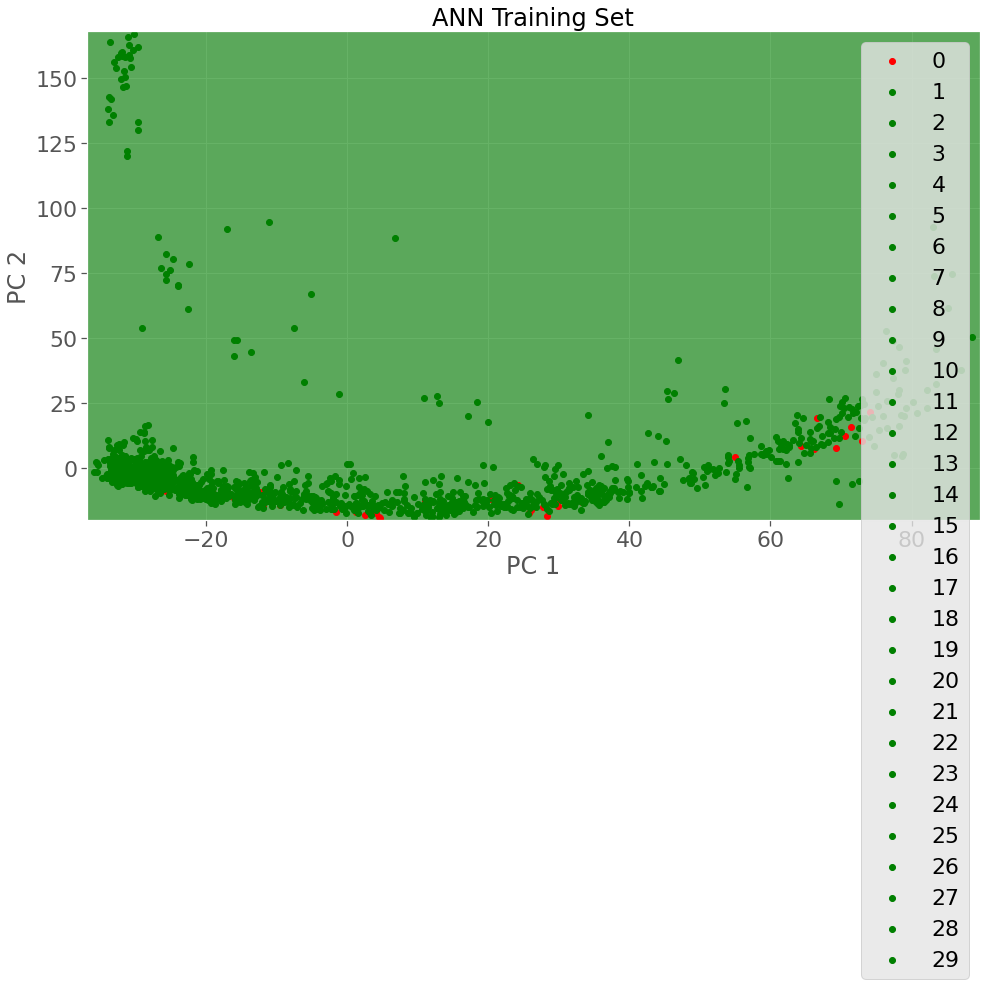

In [41]:
visualization_train(model='ANN')

In [ ]:
### Visualising the Logistic Regression Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

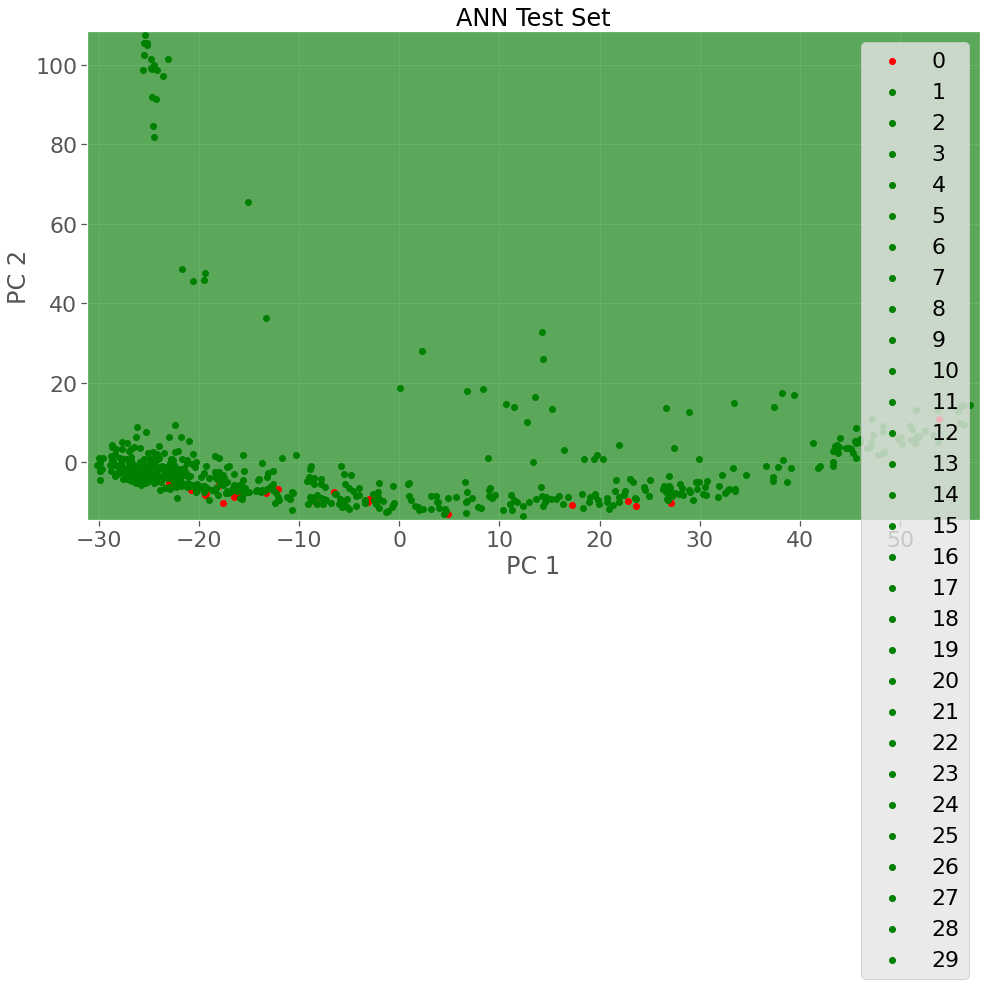

In [42]:
visualization_test(model='ANN')

In [ ]:
### Creating a func to evaluate model's performance.


In [43]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [44]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [ ]:
# Logistic Regression Model

In [ ]:
### Fitting Logistic Regression model to the Training set

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
### Logistic Regression Training Results

In [46]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.0987

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.03      0.02        60
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        55
           3       0.80      0.10      0.17        42
           4       0.00      0.00      0.00        37
           5       0.07      0.63      0.13        52
           6       0.00      0.00      0.00        58
           7       0.83      0.89      0.86        64
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        45
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        40
          16   

In [ ]:
### Logistic Regression Test Results

In [47]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.0940

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        25
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        22
           5       0.07      0.48      0.13        31
           6       0.00      0.00      0.00        26
           7       1.00      0.65      0.79        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        17
          16       

In [ ]:
# Support Vecor (SVC) Classification Model

In [ ]:
### Fitting SVC to the Training set

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(random_state=42)

In [ ]:
### SVC Training Results

In [52]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.1223

Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.35      0.10        60
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        55
           3       0.61      0.33      0.43        42
           4       0.00      0.00      0.00        37
           5       0.08      0.54      0.13        52
           6       0.04      0.10      0.06        58
           7       0.96      1.00      0.98        64
           8       0.10      0.02      0.03        52
           9       0.00      0.00      0.00        45
          10       0.06      0.20      0.09        56
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        40
          16   

In [ ]:
### SVC Test Results

In [53]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.1556

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.40      0.16        25
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.71      0.22      0.33        23
           4       0.00      0.00      0.00        22
           5       0.11      0.45      0.18        31
           6       0.04      0.19      0.06        26
           7       1.00      1.00      1.00        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        20
          10       0.10      0.20      0.14        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        17
          16       

In [ ]:
# K Nearest Neighbors (K-NN) Classification Model

In [ ]:
### Fitting K-NN to the Training set

In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
### K-NN Training Results

In [55]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.3600

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.82      0.41        60
           1       0.24      0.63      0.35        46
           2       0.24      0.60      0.35        55
           3       0.44      0.67      0.53        42
           4       0.25      0.49      0.33        37
           5       0.27      0.42      0.33        52
           6       0.29      0.43      0.35        58
           7       0.97      1.00      0.98        64
           8       0.32      0.33      0.32        52
           9       0.30      0.29      0.30        45
          10       0.37      0.45      0.40        56
          11       0.41      0.44      0.42        50
          12       0.17      0.11      0.13        36
          13       0.42      0.27      0.33        41
          14       0.38      0.07      0.12        40
          15       0.27      0.10      0.15        40
          16   

In [ ]:
### K-NN Test Results

In [56]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.1070

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.16      0.12        25
           1       0.00      0.00      0.00        14
           2       0.06      0.14      0.08        21
           3       0.13      0.26      0.17        23
           4       0.02      0.05      0.03        22
           5       0.04      0.06      0.05        31
           6       0.00      0.00      0.00        26
           7       1.00      1.00      1.00        40
           8       0.00      0.00      0.00        12
           9       0.08      0.05      0.06        20
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        17
          16       

In [ ]:
# Naive Bayes Classification Model

In [ ]:
### Fitting Naive Bayes classifier to the Training set

In [58]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
### Naive Bayes Training Results

In [59]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.1008

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.05      0.08        60
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        55
           3       0.53      0.19      0.28        42
           4       0.03      0.24      0.05        37
           5       0.07      0.52      0.12        52
           6       0.11      0.05      0.07        58
           7       0.95      0.81      0.87        64
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        45
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        50
          12       0.08      0.08      0.08        36
          13       0.04      0.02      0.03        41
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        40
          16   

In [ ]:
### Naive Bayes Test Results

In [60]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.0827

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       1.00      0.13      0.23        23
           4       0.01      0.09      0.02        22
           5       0.07      0.52      0.12        31
           6       0.00      0.00      0.00        26
           7       1.00      0.57      0.73        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        17
          16       

In [ ]:
# Decision Tree Classification Model

In [ ]:
### Fitting Decision Tree classifier to the Training set

In [62]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
## Decision Tree Training Results

In [63]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        64
           8       1.00      1.00      1.00        52
           9       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        56
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        41
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16   

In [ ]:
## Decision Tree Test Results

In [64]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.0940

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.04      0.06        25
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.20      0.26      0.23        23
           4       0.03      0.05      0.04        22
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        26
           7       1.00      0.75      0.86        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.09      0.04      0.05        28
          14       0.00      0.00      0.00        14
          15       0.06      0.06      0.06        17
          16       

In [ ]:
# Random Forest Classification Model

In [ ]:
### Fitting Random Forest classifier to the Training set

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
### Random Forest Training Results

In [68]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        64
           8       1.00      1.00      1.00        52
           9       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        56
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        41
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16   

In [ ]:
### Random Forest Test Results

In [69]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.0924

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.23      0.30      0.26        23
           4       0.04      0.05      0.04        22
           5       0.07      0.06      0.07        31
           6       0.00      0.00      0.00        26
           7       1.00      0.75      0.86        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        20
          10       0.07      0.04      0.05        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        17
          16       